# Model Performance and Evaluation Method : bankloan dataset

## Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
bankloan= pd.read_csv('bankloan.csv')
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


## Data splitting

In [3]:
x=bankloan[['employ', 'debtinc','creddebt', 'othdebt']]
y= bankloan['default']

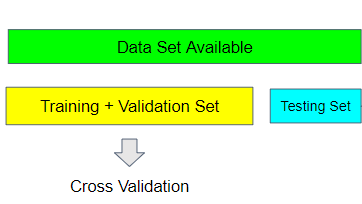

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test= train_test_split(x,y, stratify= y, test_size=0.2, random_state=2020)

## Benchmark Model

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report, f1_score

In [7]:
logreg= LogisticRegression(solver='liblinear', random_state=2020)
knn= KNeighborsClassifier()
tree= DecisionTreeClassifier(max_depth=3, criterion='entropy')

### Cross validation

#### Accuracy

In [8]:
skfold= StratifiedKFold(n_splits=5)

logreg_cv= cross_val_score(logreg, x_train, y_train, cv= skfold)
knn_cv= cross_val_score(knn, x_train, y_train, cv= skfold)
tree_cv= cross_val_score(tree, x_train, y_train, cv= skfold)

In [9]:
print('CV logreg', logreg_cv)
print('CV knn', knn_cv)
print('CV tree', tree_cv)

CV logreg [0.79464286 0.79464286 0.83928571 0.79464286 0.77678571]
CV knn [0.75       0.71428571 0.75892857 0.77678571 0.71428571]
CV tree [0.83035714 0.67857143 0.82142857 0.73214286 0.79464286]


In [10]:
print('CV logreg mean', logreg_cv.mean())
print('CV knn mean', knn_cv.mean())
print('CV tree mean', tree_cv.mean())

CV logreg mean 0.8
CV knn mean 0.7428571428571429
CV tree mean 0.7714285714285716


In [11]:
print('CV logreg std', logreg_cv.std())
print('CV knn std', knn_cv.std())
print('CV tree std', tree_cv.std())

CV logreg std 0.020824828195876083
CV knn std 0.024872121923543065
CV tree std 0.057753434388557956


#### Recall

In [12]:
skfold= StratifiedKFold(n_splits=5)

logreg_cv= cross_val_score(logreg, x_train, y_train, cv= skfold, scoring='recall')
knn_cv= cross_val_score(knn, x_train, y_train, cv= skfold, scoring='recall')
tree_cv= cross_val_score(tree, x_train, y_train, cv= skfold, scoring='recall')

In [13]:
print('CV logreg', logreg_cv)
print('CV knn', knn_cv)
print('CV tree', tree_cv)

CV logreg [0.5        0.31034483 0.5862069  0.44827586 0.48275862]
CV knn [0.4        0.31034483 0.37931034 0.24137931 0.27586207]
CV tree [0.63333333 0.37931034 0.51724138 0.24137931 0.51724138]


In [14]:
print('CV logreg mean', logreg_cv.mean())
print('CV knn mean', knn_cv.mean())
print('CV tree mean', tree_cv.mean())

CV logreg mean 0.46551724137931033
CV knn mean 0.3213793103448276
CV tree mean 0.4577011494252874


In [15]:
print('CV logreg std', logreg_cv.std())
print('CV knn std', knn_cv.std())
print('CV tree std', tree_cv.std())

CV logreg std 0.08992003317520893
CV knn std 0.06021759987018779
CV tree std 0.13481616986286768


#### Flexible metric

In [16]:
def model_evaluation_cv(model, metric):
    skfold= StratifiedKFold(n_splits=5)
    return cross_val_score(model, x_train, y_train, cv= skfold, scoring=metric)

In [17]:
def print_result(model_cv):
    print('CV score', model_cv)
    print('CV mean', model_cv.mean())
    print('CV std', model_cv.std())

In [18]:
model_cv= model_evaluation_cv(logreg,'f1')

In [19]:
print_result(model_cv)

CV score [0.56603774 0.43902439 0.65384615 0.53061224 0.52830189]
CV mean 0.543564482325905
CV std 0.06927688261828344


### Model Performance in Test Set
dari hasil cross validasi (recall), kita melihat bahwa log regresi memiliki performa rata-rata yang paling tinggi dan cukup stabil. Sekarang, mari kita lihat performa model log regresi terhadap data test

In [20]:
import seaborn as sns

In [21]:
logreg= LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [22]:
y_pred= logreg.predict(x_test)
y_proba= logreg.predict_proba(x_test)

In [23]:
y_proba=y_proba[:,1]

In [24]:
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

recall 0.4864864864864865
precision 0.782608695652174
f1 0.6000000000000001


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [26]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve, average_precision_score, plot_precision_recall_curve

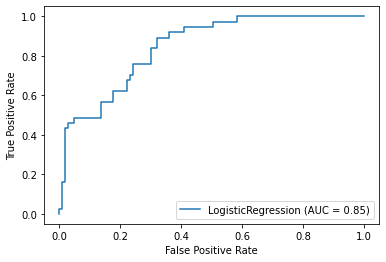

In [27]:
plot_roc_curve(logreg, x_test, y_test)

In [28]:
roc_auc_score(y_test, y_proba)

0.8475465757019154

In [29]:
fpr, tpr, thresholds = roc_curve(y_test,y_proba, pos_label=1)

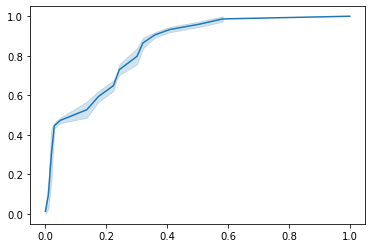

In [30]:
sns.lineplot(fpr, tpr)

In [31]:
pd.set_option('display.max_rows',None)
pd.DataFrame({
    'fpr':fpr,
    'tpr':tpr,
    'thresholds': thresholds
    
})

,fpr,tpr,thresholds
0,0.000000,0.000000,1.945205
1,0.000000,0.027027,0.945205
2,0.009709,0.027027,0.934398
3,0.009709,0.162162,0.733896
4,0.019417,0.162162,0.691082
5,0.019417,0.432432,0.543320
6,0.029126,0.432432,0.525365
7,0.029126,0.459459,0.523860
8,0.048544,0.459459,0.508879
9,0.048544,0.486486,0.501574


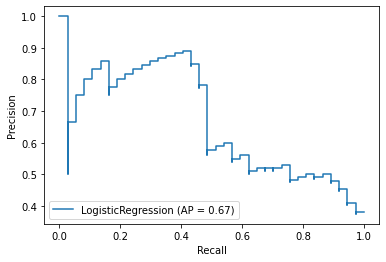

In [32]:
plot_precision_recall_curve(logreg, x_test, y_test)

In [33]:
average_precision_score(y_test, y_proba)

0.666232963658068

In [34]:
p,r,th=precision_recall_curve(y_test,y_proba)

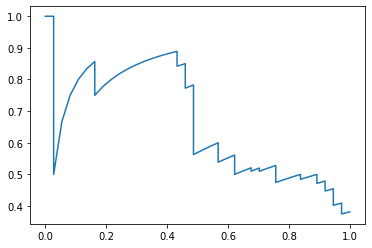

In [35]:
import matplotlib.pyplot as plt

plt.plot(r,p)

In [36]:
th=list(th)
th.insert(0,0)

In [37]:
pd.DataFrame({
    'precision':p,
    'recall':r,
    'theshold': th
})

,precision,recall,theshold
0,0.381443,1.000000,0.000000
1,0.375000,0.972973,0.100907
2,0.378947,0.972973,0.105802
3,0.382979,0.972973,0.105869
4,0.387097,0.972973,0.106504
5,0.391304,0.972973,0.111974
6,0.395604,0.972973,0.115053
7,0.400000,0.972973,0.119980
8,0.404494,0.972973,0.121079
9,0.409091,0.972973,0.135460


## Hyperparameter Tunning

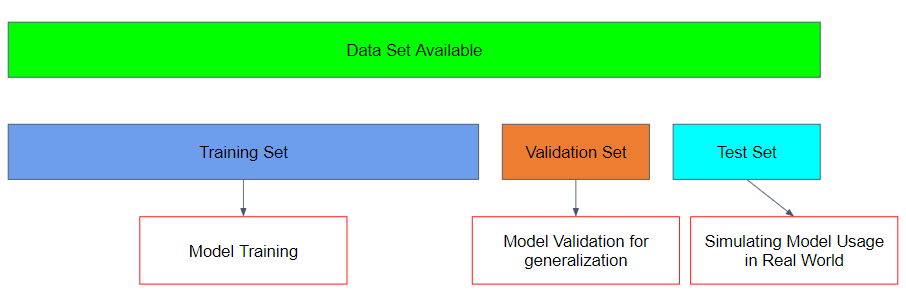

### Simple Hyperparameter Tunning

In [38]:
x_train2,x_val, y_train2, y_val= train_test_split(x_train, y_train, stratify=y_train,
                                                 test_size=0.25, #25% dari 80% data train atau 20% dari data awal
                                                 random_state=2020)

In [39]:
hyperparam_c=[1000, 500,100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
skfold=StratifiedKFold(n_splits=5)

best_score=0
training_score=[]
testing_score=[]

for i in hyperparam_c:
    logreg= LogisticRegression(C=i, solver='liblinear', random_state=2020)
    logreg.fit(x_train2,y_train2)
    y_pred_train=logreg.predict(x_train2)
    training_score.append(f1_score(y_train2,y_pred_train))
    
    y_pred_val= logreg.predict(x_val)
    score= f1_score(y_val, y_pred_val)
    testing_score.append(score)
    
    if score> best_score:
        best_score=score
        best_param=i


In [40]:
hyperparam_c=[1000, 500,100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
skfold=StratifiedKFold(n_splits=5)
best_score=0
cv_score_val=[]

for i in hyperparam_c:
    logreg=LogisticRegression(C=i, solver='liblinear', random_state=2020)
    cv_score= cross_val_score(logreg, x_train,y_train, cv=skfold, scoring='f1').mean()
    cv_score_val.append (cv_score)
    
    if cv_score> best_score:
        best_score= cv_score
        best_param_cv= i

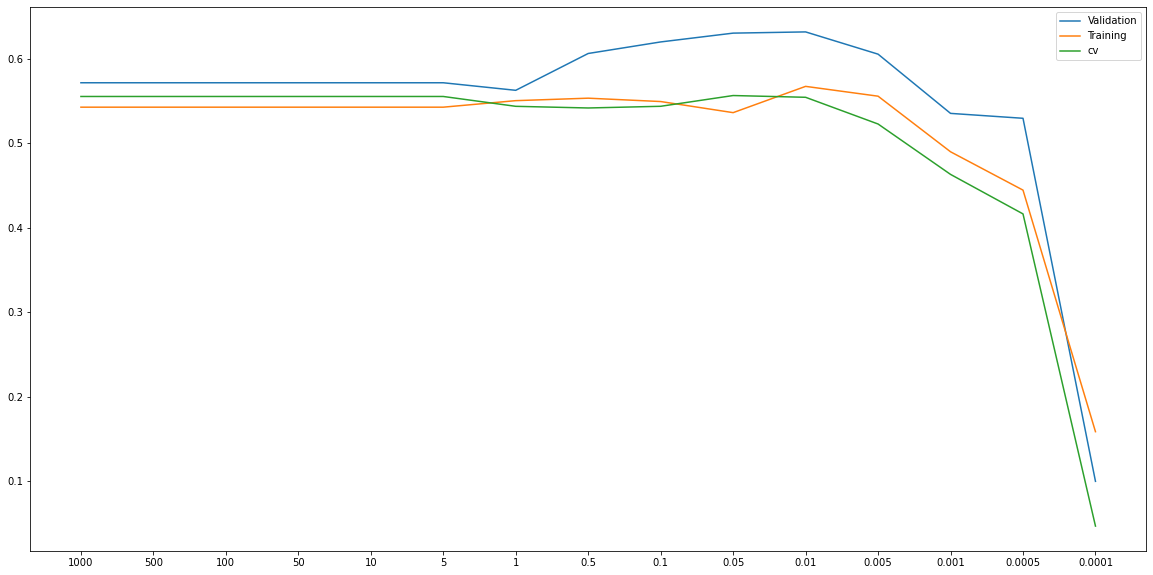

In [41]:
length= range(len(hyperparam_c))
plt.figure(figsize=(20,10))
sns.lineplot(length, testing_score)
sns.lineplot(length, training_score)
sns.lineplot(length, cv_score_val)
plt.legend(['Validation', 'Training','cv'])
plt.xticks(length, hyperparam_c)
plt.show()

In [42]:
best_param

0.01

In [43]:
best_param_cv, best_score

(0.05, 0.5563225088777649)

### Before and After Tunning

In [44]:
# before tunning
logreg= LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [45]:
# After tunning
logreg= LogisticRegression(solver='liblinear', C=best_param_cv)
logreg.fit(x_train,y_train)
y_pred= logreg.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



Setelah dilakukan hyperparameter tunning, performa model (F1) malah turun dari 60% menjadi 58%. Ini bisa terjadi karena:
    1. peningkatan oleh hyperparameter tunning tidak signifikan
    2. range hyperparameter yang dipilih menyebabkan overfitting/ model tidak stabil
    
solusi:
    1. ganti model
    2. feature engineering
    3. tambah hyperparameter

### Grid Search

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
hyperparam_space={
    'C':[1000, 500,100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], #benchmark C: 1 dan 0.05
    'max_iter':[100, 200, 300, 400, 500, 1000] #benchmark 100
}

C= 15 parameter  
max iter= 6 parameter  
cv= 5 fold  
jadi, ketika kita memakai grid search, model akan ditraining sebanyak 15x6x5= 450 kali

In [48]:
skfold=StratifiedKFold(n_splits=5)

logreg= LogisticRegression(solver='liblinear', random_state=2020)

grid_search= GridSearchCV(
    logreg, #model to tune
    param_grid=hyperparam_space, #hyperparameter space
    cv= skfold,
    scoring='f1', #metric
    n_jobs= -1 #use all cores in hardware, kalau error ram gak kuat, kalian bisa matikan parameter ini
)

In [49]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=2020,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'max_iter': [100, 200, 300, 400, 500, 1000]},
             scoring='f1')

In [50]:
print('best score', grid_search.best_score_)
print('best param', grid_search.best_params_)

best score 0.5563225088777649
best param {'C': 0.05, 'max_iter': 100}


In [51]:
pd.DataFrame(grid_search.cv_results_) # score dari semua kombinasi

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007929,7.839349e-04,0.004838,0.000374,1000,100,"{'C': 1000, 'max_iter': 100}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
1,0.008844,1.286462e-03,0.004865,0.000667,1000,200,"{'C': 1000, 'max_iter': 200}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
2,0.007544,1.076302e-03,0.004476,0.000429,1000,300,"{'C': 1000, 'max_iter': 300}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
3,0.006808,4.763271e-04,0.004554,0.000465,1000,400,"{'C': 1000, 'max_iter': 400}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
4,0.005806,4.120669e-04,0.004583,0.000497,1000,500,"{'C': 1000, 'max_iter': 500}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
5,0.006162,4.125050e-04,0.004825,0.000487,1000,1000,"{'C': 1000, 'max_iter': 1000}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
6,0.006087,2.834920e-04,0.004358,0.000365,500,100,"{'C': 500, 'max_iter': 100}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
7,0.005813,7.362930e-04,0.003717,0.000922,500,200,"{'C': 500, 'max_iter': 200}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
8,0.005824,2.603165e-04,0.003188,0.000803,500,300,"{'C': 500, 'max_iter': 300}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
9,0.006069,1.883036e-04,0.004200,0.000495,500,400,"{'C': 500, 'max_iter': 400}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7


Dengan metode ini, parameter terbaik yang ditemukan adalah c= 0.05 dan max iter= 100, sama dengan hasil sebelumnya. Jadi, tidak ada efek penambahan parameter max iter, kita bisa coba metode lain atau feature engineering

In [52]:
# before vs after tuning

In [53]:
# before tunning
logreg= LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [54]:
logreg= grid_search.best_estimator_
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



# Tugas


In [55]:
df= pd.read_csv('titanic.csv')
df.head()

,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True


y= alive  
skema preprosesing:
    * drop deck
    * isi missing value age dengan simple imputer median
    * isi missing value embark town dengan modus
    * sex, embark town, alone: one hot encoding
    * class: ordinal
    
* tentukan metrik evaluasi yang sesuai untuk kasus titanic
* pilih model terbaik dengan cross validasi dari:
    * logreg: solver liblinear
    * knn
    * decision tree: max depth= 3

In [56]:
y= np.where(df['alive']=='yes',1,0)
x= df.loc[:,['sex','age','parch','fare','class','embark_town','alone']]

In [57]:
x_train, x_test, y_train, y_test= train_test_split(x,y, stratify=y, random_state=2020, test_size=.2)

In [58]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [59]:
onehot= Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('one hot',OneHotEncoder(drop='first'))
])

In [60]:
mapping= [{'col':'class', 'mapping':{None: 0,'First':1,'Second':2, 'Third':3}}]
ordinal= ce.OrdinalEncoder(mapping=mapping)

In [61]:
transformer= ColumnTransformer([
    ('One Hot', onehot, ['sex','embark_town','alone']),
    ('ordinal', ordinal,['class']),
    ('impute', SimpleImputer(strategy='median'), ['age'])
    ], remainder='passthrough') 

In [62]:
x.columns

Index(['sex', 'age', 'parch', 'fare', 'class', 'embark_town', 'alone'], dtype='object')

In [63]:
x_train_preprocessed= pd.DataFrame(transformer.fit_transform(x_train))
x_test_preprocessed= pd.DataFrame(transformer.transform(x_test))
features=list(transformer.transformers_[0][1][1].get_feature_names())+transformer.transformers_[1][1].get_feature_names()+['age', 'fare','parch']

In [64]:
x_train_preprocessed.columns=features
x_test_preprocessed.columns=features

In [65]:
logreg=LogisticRegression(solver='liblinear')
knn=KNeighborsClassifier()
tree= DecisionTreeClassifier(max_depth=3)

In [66]:
models=[logreg,knn,tree]
rata=[]
standv=[]
for i in models:
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(i, x_train_preprocessed, y_train, cv = skfold, scoring = 'precision')
    rata.append(model_cv.mean())
    standv.append(model_cv.std())

In [67]:
pd.DataFrame({
    'model':['logreg','knn','tree'],
    'mean':rata,
    'std':standv
})

,model,mean,std
0,logreg,0.760383,0.064139
1,knn,0.620021,0.065225
2,tree,0.794540,0.038664


In [68]:
# MODEL PERFORMACE IN TEST SET
tree= DecisionTreeClassifier(max_depth=3)
tree.fit(x_train_preprocessed,y_train)

DecisionTreeClassifier(max_depth=3)

In [69]:
y_pred= tree.predict(x_test_preprocessed)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.73      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179



# Model Performance and Evaluation Method : tips dataset

## Data

In [71]:
tips= sns.load_dataset('tips')

In [72]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [73]:
x=tips.drop(columns='tip')
y=tips['tip']

In [74]:
x= pd.get_dummies(x, drop_first=True)

## Splitting data

In [75]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state= 2020)

## Benchmark Model

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error

In [77]:
tree= DecisionTreeRegressor(criterion='mse', max_depth=5,random_state=2020)
linreg= LinearRegression()
knn= KNeighborsRegressor()

In [78]:
from sklearn.metrics import SCORERS

In [79]:
SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'roc_auc': make_scorer(roc_auc_score, needs_threshold=True),
 'roc_auc_ovr': make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr),
 'roc_auc_ovo': make_sc

In [80]:
models=[tree, linreg, knn]
mean_score=[]
std_score=[]
for i in models:
    model_cv= cross_val_score(i, x_train,y_train, scoring='neg_mean_squared_error')
    mean_score.append(model_cv.mean())
    std_score.append(model_cv.std())

In [81]:
pd.DataFrame({
    'model':['tree','linreg','knn'],
    'mean': mean_score,
    'std': std_score
})

,model,mean,std
0,tree,-1.292556,0.267949
1,linreg,-1.132021,0.339332
2,knn,-1.242882,0.255523


Score paling tinggi adalah model linear regresi, yang paling stabil adalah knn.  

kita seharusnya mencoba antara kedua model ini. Tapi, dalam contoh kasus ini, kita akan mencoba dengan decision tree regressor

### Model Performance in data test

In [82]:
tree= DecisionTreeRegressor(criterion='mse', max_depth=5)
tree.fit(x_train, y_train)
y_pred= tree.predict(x_test)

In [83]:
print('mse:', mean_squared_error(y_test, y_pred))

mse: 1.5032560629777967


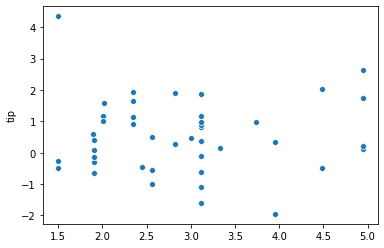

In [84]:
residuals= y_test-y_pred
sns.scatterplot(y_pred, residuals)

## Hyperparameter tuning: randomized search

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
hyperparam_space= {
    'min_samples_leaf':[1,5,10,15,20,50], #benchmark 1
    'max_depth':[2,3,4,5,6,7], #benchmark 5
    'criterion':['mse', 'mae'] #benchmark mse
}

In [87]:
tree= DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=2020)

random_search= RandomizedSearchCV(
    tree, #model to tune
    param_distributions=hyperparam_space, #hyperparam space
    n_iter=20, #jumlah training, dalam kasus ini random search akan memilih 20 kombinasi secara acak dari total 72 kombinasi
    cv=5,
    scoring='neg_mean_squared_error', #metric
    random_state=2020,
    n_jobs= -1
)

In [88]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=5,
                                                   random_state=2020),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 5, 10, 15, 20,
                                                             50]},
                   random_state=2020, scoring='neg_mean_squared_error')

In [89]:
print('best score', random_search.best_score_)
print('best param', random_search.best_params_)

best score -0.9829038972124049
best param {'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'mse'}


In [90]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008217,0.000535,0.003741,4.356061e-04,1,2,mae,"{'min_samples_leaf': 1, 'max_depth': 2, 'crite...",-0.738330,-0.851707,-1.323954,-1.509013,-1.356648,-1.155931,0.303358,3
1,0.006057,0.000486,0.004061,1.432669e-04,5,7,mse,"{'min_samples_leaf': 5, 'max_depth': 7, 'crite...",-1.266981,-0.767827,-1.325200,-2.239966,-1.472244,-1.414444,0.475952,19
2,0.010400,0.004662,0.003812,4.152604e-04,5,4,mse,"{'min_samples_leaf': 5, 'max_depth': 4, 'crite...",-1.144108,-0.817462,-1.375826,-2.197390,-1.445703,-1.396098,0.456784,18
3,0.007164,0.000588,0.003729,2.547628e-04,20,2,mae,"{'min_samples_leaf': 20, 'max_depth': 2, 'crit...",-0.722048,-1.093600,-1.182453,-1.955167,-1.356648,-1.261983,0.403899,6
4,0.007183,0.000358,0.003415,5.255112e-04,5,2,mae,"{'min_samples_leaf': 5, 'max_depth': 2, 'crite...",-0.722048,-1.093600,-1.215538,-1.960931,-1.356648,-1.269753,0.404778,8
5,0.005978,0.001092,0.003590,1.739080e-03,50,7,mse,"{'min_samples_leaf': 50, 'max_depth': 7, 'crit...",-0.879731,-0.900169,-1.479036,-2.103678,-1.437448,-1.360013,0.450628,12
6,0.005586,0.000797,0.003191,7.461498e-04,1,4,mse,"{'min_samples_leaf': 1, 'max_depth': 4, 'crite...",-0.771622,-0.665101,-1.593723,-1.029129,-0.854944,-0.982904,0.327795,1
7,0.005585,0.000489,0.002792,3.997091e-04,5,3,mse,"{'min_samples_leaf': 5, 'max_depth': 3, 'crite...",-0.987999,-0.897975,-1.295115,-2.212884,-1.413923,-1.361579,0.466126,14
8,0.006781,0.000398,0.003192,3.988275e-04,20,4,mae,"{'min_samples_leaf': 20, 'max_depth': 4, 'crit...",-0.805774,-1.082392,-1.204603,-1.997315,-1.332621,-1.284541,0.396694,9
9,0.006184,0.001595,0.003391,4.881691e-04,1,2,mse,"{'min_samples_leaf': 1, 'max_depth': 2, 'crite...",-0.816130,-0.882642,-1.424336,-1.108872,-0.924132,-1.031222,0.219261,2


Coba lagi setelah mengganti nilai random state

### Before and After Tunning

In [91]:
tree= DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=2020)
tree.fit(x_train, y_train)
y_pred= tree.predict(x_test)
print('mse:', mean_squared_error(y_test, y_pred))

mse: 1.4671679252226948


In [92]:
tree_final= random_search.best_estimator_
tree_final.fit(x_train,y_train)
y_pred= tree_final.predict(x_test)
print('mse',mean_squared_error(y_test,y_pred))

mse 1.3093536770005814


hasil hyperparmeter tunning tidak meningkatkan performa model secara signifikan, karena model awal memiliki performa yang kurang stabil 

In [93]:
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 2020,
 'splitter': 'best'}

# tugas

Lakukan hyperparameter tunning untuk data tips dengan menggunakan model:  
    knn  
    lasso/ ridge --> pilih salah satu

In [128]:
# knn
hyperparam_space= {
    'n_neighbors':[25,27,29,31,33,35,37,51], #benchmark 5
    'weights':['uniform', 'distance'], #benchmark uniform
}

In [129]:
knn= KNeighborsRegressor()
grid_search= GridSearchCV(
    knn, #model to tune
    param_grid=hyperparam_space, #hyperparam space
    cv=5,
    scoring='neg_mean_squared_error', #metric
    n_jobs= -1
)

In [130]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [25, 27, 29, 31, 33, 35, 37, 51],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [131]:
grid_search.best_score_, grid_search.best_params_

(-1.0245755223368462, {'n_neighbors': 35, 'weights': 'distance'})

In [123]:
knn= KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test)
print('mse',mean_squared_error(y_test,y_pred))

mse 1.689866367346939


In [132]:
knn= grid_search.best_estimator_
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test)
print('mse',mean_squared_error(y_test,y_pred))

mse 1.4657277777052418


In [99]:
from sklearn.linear_model import Lasso, Ridge

In [100]:
lasso= Lasso()
ridge= Ridge()
models=[lasso, ridge]
rata=[]
standv=[]
for i in models:
    model_cv = cross_val_score(i, x_train, y_train, scoring = 'neg_mean_squared_error')
    rata.append(model_cv.mean())
    standv.append(model_cv.std())

In [102]:
pd.DataFrame({'model':['lasso','ridge'],'mean':rata,'std':standv})

,model,mean,std
0,lasso,-1.056487,0.319386
1,ridge,-1.127811,0.335496


In [136]:
# lasso
hyperparam_space= {'alpha':[1000,100,10,1,0,0.1,0.001], #benchmark 1
                  'max_iter':[100,200,500,1000]}

In [137]:
lasso= Lasso()
grid_search= GridSearchCV(
    lasso, #model to tune
    param_grid=hyperparam_space, #hyperparam space
    cv=5,
    scoring='neg_mean_squared_error', #metric
    n_jobs= -1
)

In [138]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1000, 100, 10, 1, 0, 0.1, 0.001],
                         'max_iter': [100, 200, 500, 1000]},
             scoring='neg_mean_squared_error')

In [139]:
grid_search.best_score_, grid_search.best_params_

(-1.0563987008136424, {'alpha': 0.1, 'max_iter': 100})

In [140]:
lasso= Lasso()
lasso.fit(x_train,y_train)
y_pred= lasso.predict(x_test)
print('mse',mean_squared_error(y_test,y_pred))

mse 1.3925921661547078


In [141]:
lasso= grid_search.best_estimator_
lasso.fit(x_train,y_train)
y_pred= lasso.predict(x_test)
print('mse',mean_squared_error(y_test,y_pred))

mse 1.3254314908936675
